In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # snsset sets the plotting style as of seaborn
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [15]:
# Importing the dataset
df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
df = pd.concat([df, pd.DataFrame(load_iris().target, columns=['species'])], axis=1)

# Removing all columns with 3rd species for binary classification
df = df[df['species'] != 2]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df.value_counts('species')

species
0    50
1    50
Name: count, dtype: int64

c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


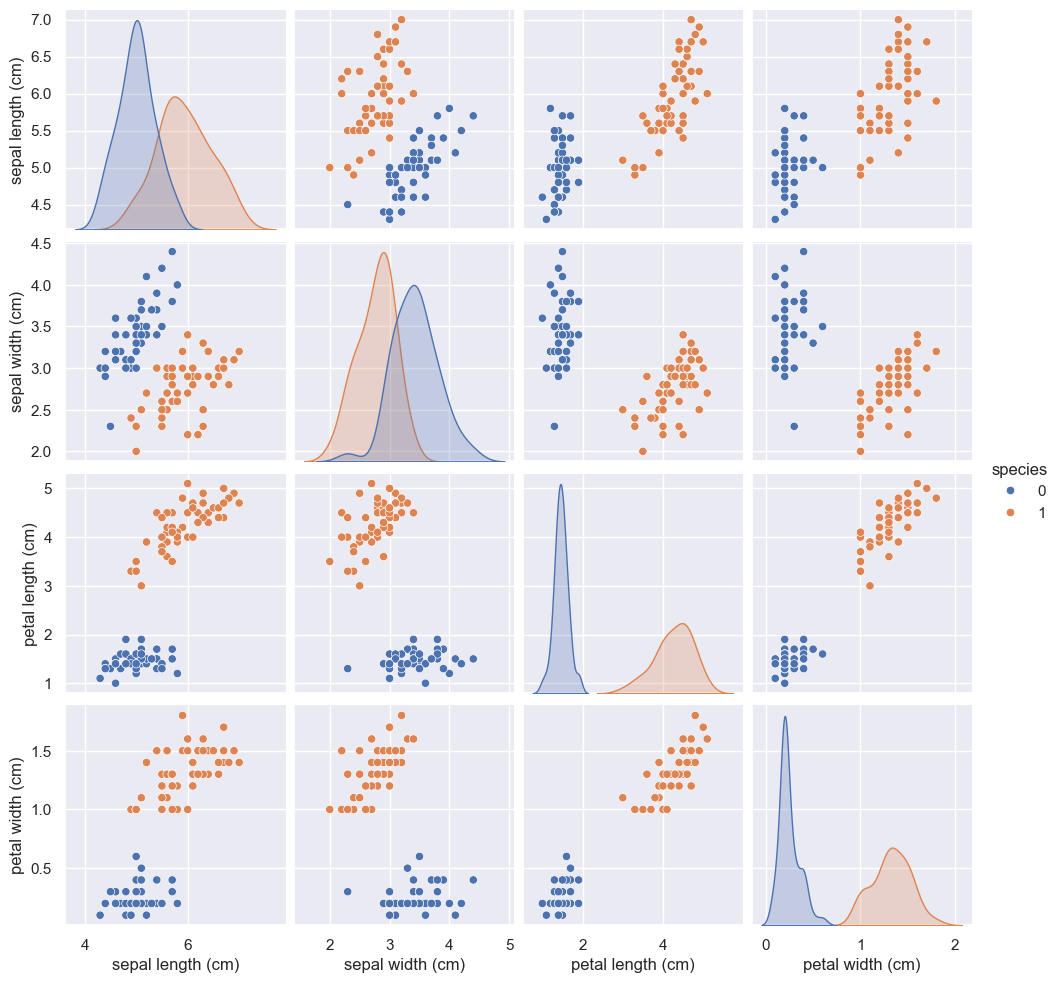

In [17]:
# Exploring the dataset
sns.pairplot(df, hue='species', height=2.5)

In [19]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(df.drop('species', axis=1), df['species'], random_state=108)

# Scaling the dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
svm_classifier = SVC(kernel="linear", C=1) # decreasing c will allow more error
svm_classifier.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [36]:
# Evaluating the model
y_pred = svm_classifier.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

